### 出欠問題

In [1]:
def sum(n):
    if n <= 1:
        return 1
    return sum(n-1) + n 

print(sum(4))

10


### グラフの作成

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [45]:
G = nx.DiGraph()  ## 有向グラフはDigGraph()

In [46]:
G.add_node('a')
G.add_node('b')
G.add_node('c')
G.add_node('d')
G.add_node('e')
G.add_node('f')

G.add_edge('a','b', weight=10)
G.add_edge('a','d', weight=3)
G.add_edge('a','c', weight=2)
G.add_edge('b','a',weight=1)
G.add_edge('c','f',weight=2)
G.add_edge('d','e',weight=5)
G.add_edge('e','b',weight=3)
G.add_edge('e','d',weight=2)
G.add_edge('f','e',weight=1)

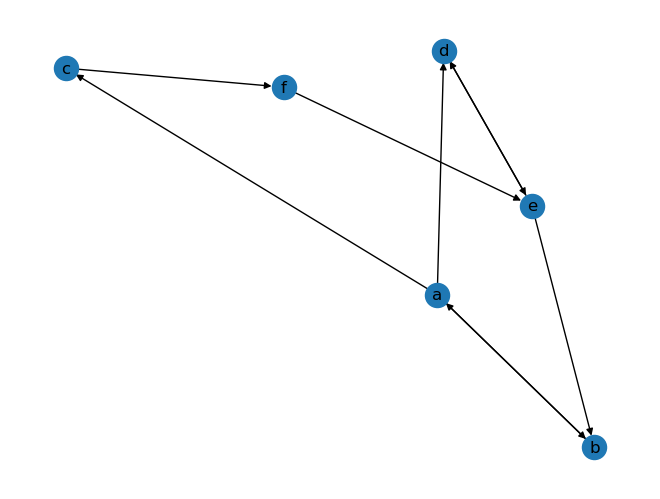

In [47]:
nx.draw(G, with_labels =True)

### ダイクストラ法の実装

In [48]:
from collections import deque

In [54]:
def weight(G, u, v):
    return G.edges[u,v]['weight']

def dijkstra(G, s, g):
    d = {}
    prev = {}
    Q = []

    for v in G.nodes:
        if s == v:
            d[v] = 0
        else:
            d[v] = float('inf')
        Q.append(v)

        while len(Q) > 0:
            u = min(Q, key = lambda v:  d[v])
            Q.remove(u)
        
        for v in G.adj[u]:
            if d[v] > d[u] + weight (G,u, v):
                d[v] = d[u] + weight(G,u,v)
                prev[v] = u
                

    shortest_path =deque(g)

    while g != s:
        g = prev[g]
        shortest_path.appendleft(g)
        
    return shortest_path

In [55]:
dijkstra(G,'a','b')

KeyError: 'b'

In [28]:
nx.shortest_path(G,source='a',target='d')

['a', 'd']

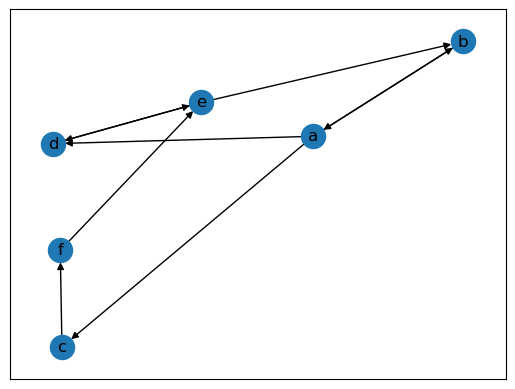

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_node('a')
G.add_node('b')
G.add_node('c')
G.add_node('d')
G.add_node('e')
G.add_node('f')


G.add_edge('a', 'b', weight=10)
G.add_edge('a', 'c', weight=2)
G.add_edge('a', 'd', weight=3)
G.add_edge('b', 'a', weight=1)
G.add_edge('c', 'f', weight=2)
G.add_edge('d', 'e', weight=5)
G.add_edge('e', 'd', weight=2)
G.add_edge('e', 'b', weight=3)
G.add_edge('f', 'e', weight=1)

nx.draw_networkx(G)


from collections import deque

def weight(G, u, v):
    return G.edges[u,v]['weight']

def dijkstra(G, s, g):
    
    d = {}
    prev = {}
    Q = []
    
    for v in G.nodes:
        if s == v:
            d[v] = 0
        else:
            d[v] = float('inf')
        Q.append(v)
    

    while len(Q) > 0:
        u = min(Q, key = lambda v: d[v])
        Q.remove(u)
    
  
        for v in G.adj[u]:
            if d[v] > d[u] + weight(G,u,v):
                d[v] = d[u] + weight(G,u,v)
                prev[v] = u


    shortest_path = deque(g)             
    while g != s:
        g = prev[g]
        shortest_path.appendleft(g)
    return shortest_path

In [44]:
dijkstra(G,'a','b')

deque(['a', 'c', 'f', 'e', 'b'])